In [1]:
 #Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #This adjusts the configuration of the plot we will create

In [2]:
#read in the data

df = pd.read_csv('/Users/user/Downloads/DATA ANALYST PROJECT/movies.csv')

In [3]:
#let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

# Data Cleaning 




In [4]:
# looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col]. isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#The above result shows that columns like rating, bugdet and gross have missing data with a percentage of 1%, 28% and 2% respectively.

In [6]:
# Handle missing values by filling it with 0

df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)

In [7]:
#data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#changing datatype of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
#changing the year column 

df['correct_year'] = df['released'].astype(str).str.split().str[2]

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime correct_year  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [10]:
#ordering by the gross revenue in decending order

df.sort_values(by = ['gross'], inplace = False, ascending = False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime correct_year  
5445  2847246203            Twentieth Century Fox    162.0         2009  
7445  2797501328                   Marvel Studios    181.0         2019  
3045  2201647264            Twentieth Century Fox    194.0         1997  
6663  2069521700                        Lucasfilm    138.0         2015  
7244  2048359754                   Marvel Studios    149.0         2018  
...          ...                              ...      ...          ...  
1617           0          Gibraltar Entertainment     92.0         1990  
1614           0                    Allied Vision     85.0         1989  
1606           0  Trans World Entertainment (TWE)     89.0         1989  
1601           0         Budapest Stúdió Vállalat    104.0         1990  
7667           0                      PK 65 Films    102.0         2020  

[7668 rows x 16 columns]

In [11]:
#Taking a look at the dataset

pd.set_option('display.max_rows', None)

In [12]:
#Drop any duplicates

df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

# Exploratory Data Analysis

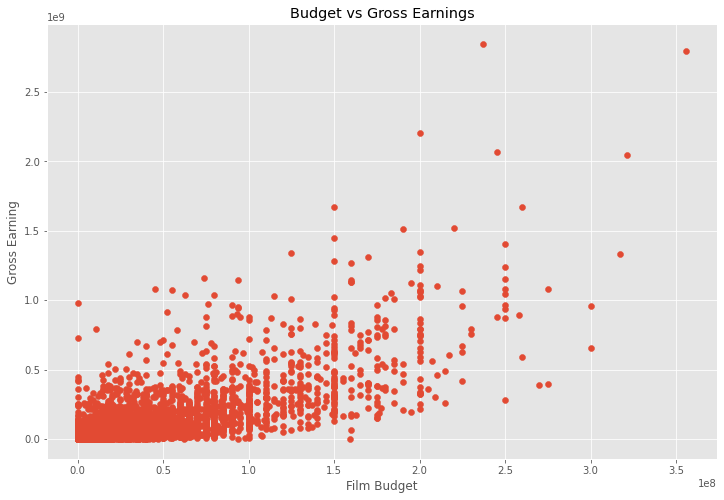

In [13]:
# scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Film Budget')

plt.ylabel('Gross Earning')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

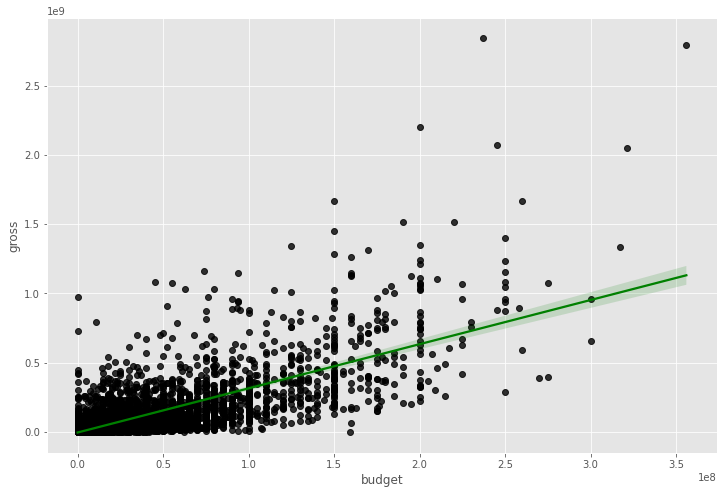

In [14]:
#To determine if it is correlated
# Plot Budget vs Gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"black"}, line_kws = {"color":"green"})

In [15]:
#let's start looking at correlation

In [16]:
df.corr(method = 'kendall') #Kendall correlation

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016
gross    0.216595  0.090626  0.560118  0.541956  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000

In [17]:
# Based on the above result, we can see that there is a high correlation between budget and gross

In [18]:
df.corr(method = 'pearson')   #pearson correlation 

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [19]:
df.corr(method = 'spearman') #Spearman Correlation

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.291152  0.314681  0.142977
score    0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.469829  0.428138  1.000000  0.604627  0.752265  0.290159
budget   0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748
gross    0.314681  0.132569  0.752265  0.716816  1.000000  0.256783
runtime  0.142977  0.399857  0.290159  0.246748  0.256783  1.000000

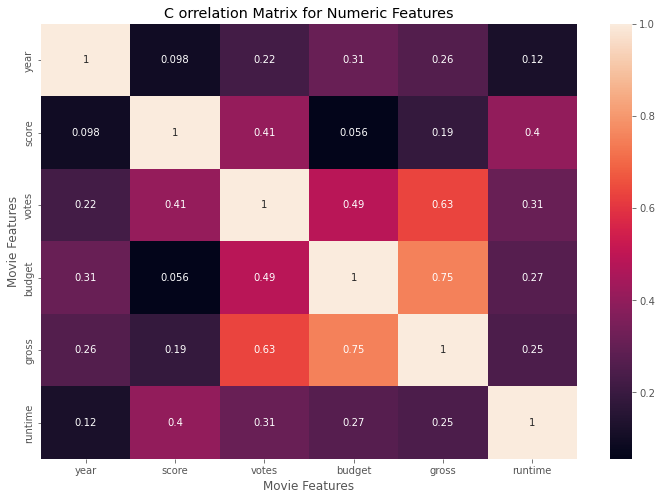

In [20]:
#Visualizing the correlation matrix using pearson correlation

correlation_matrix = df.corr(method = 'pearson')  

sns.heatmap(correlation_matrix, annot = True)

plt.title('C orrelation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [21]:
#Analysing data on company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime correct_year  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [22]:
#converting categorical columns in your DataFrame to numerical codes using the

In [23]:
df_numerized = df  

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  correct_year  
0  1047       54  19000000   46998772     2319    146.0             2  
1   327       55   4500000   58853106      731    104.0             2  
2  1745       55  18000000  538375067     1540    124.0             2  
3  2246       55   3500000   83453539     1812     88.0             2  
4   410       55   6000000   39846344     1777     98.0             2

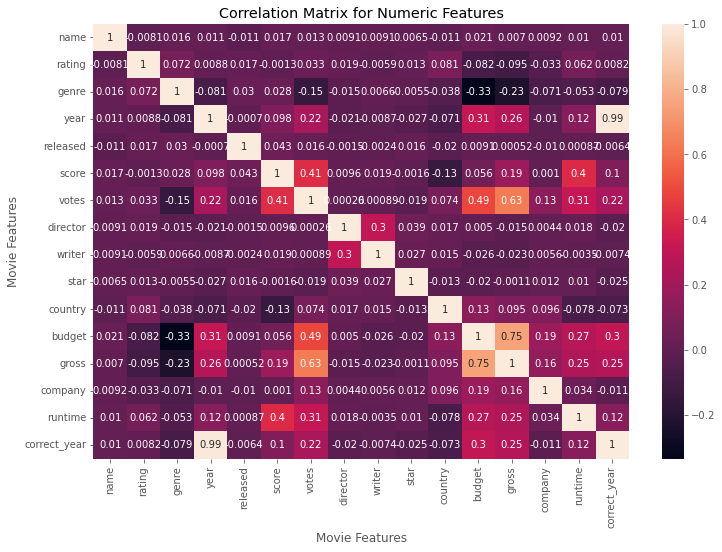

In [24]:
correlation_matrix = df_numerized.corr(method = 'pearson')  

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [25]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating       -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre         0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year          0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released     -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score         0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes         0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director      0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer        0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star          0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country      -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget        0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross         0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company       0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime       0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
correct_year  0.010071  0.008230 -0.078972  0.990063 -0.006411  0.103330   

                 votes  director    writer      star   country    budget  \
name          0.013088  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating        0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre        -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year          0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released      0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score         0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes         1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director      0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer        0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star         -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country       0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget        0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross         0.632834 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company       0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime       0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   
correct_year  0.218468 -0.019692 -0.007400 -0.025231 -0.072682  0.300649   

                 gross   company   runtime  correct_year  
name          0.006989  0.009211  0.010392      0.010071  
rating       -0.095450 -0.032943  0.062145      0.008230  
genre        -0.234297 -0.071067 -0.052711     -0.078972  
year          0.261900 -0.010431  0.120811      0.990063  
released      0.000519 -0.010474  0.000868     -0.006411  
score         0.186392  0.001030  0.399451      0.103330  
votes         0.632834  0.133204  0.309212      0.218468  
director     -0.014916  0.004404  0.017624     -0.019692  
writer       -0.022997  0.005646 -0.003511     -0.007400  
star         -0.001129  0.012442  0.010174     -0.025231  
country       0.095325  0.095548 -0.078412     -0.072682  
budget        0.750157  0.186474  0.269510      0.300649  
gross         1.000000  0.156745  0.245235      0.254946  
company       0.156745  1.000000  0.034402     -0.011060  
runtime       0.245235  0.034402  1.000000      0.120976  
correct_year  0.254946 -0.011060  0.120976      1.000000

In [26]:
#Unstacking the correlation matrix

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              correct_year    0.010071
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

In [27]:
#sorting

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
rating        budget         -0.081939
budget        rating         -0.081939
year          genre          -0.081261
genre         year           -0.081261
correct_year  genre          -0.078972
genre         correct_year   -0.078972
country       runtime        -0.078412
runtime       country        -0.078412
correct_year  country        -0.072682
country       correct_year   -0.072682
company       genre          -0.071067
genre         company        -0.071067
year          country        -0.070938
country       year           -0.070938
runtime       genre          -0.052711
genre         runtime    

In [28]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.632834
gross         votes           0.632834
              budget          0.750157
budget        gross           0.750157
correct_year  year            0.990063
year          correct_year    0.990063
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [29]:
 # The pairs "vote" and "gross", "gross" and "budget", "year" and correct_year" have high positive correlation which suggests a strong positive linear relationship between these pair.